# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from pickle import dump

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape

(768, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


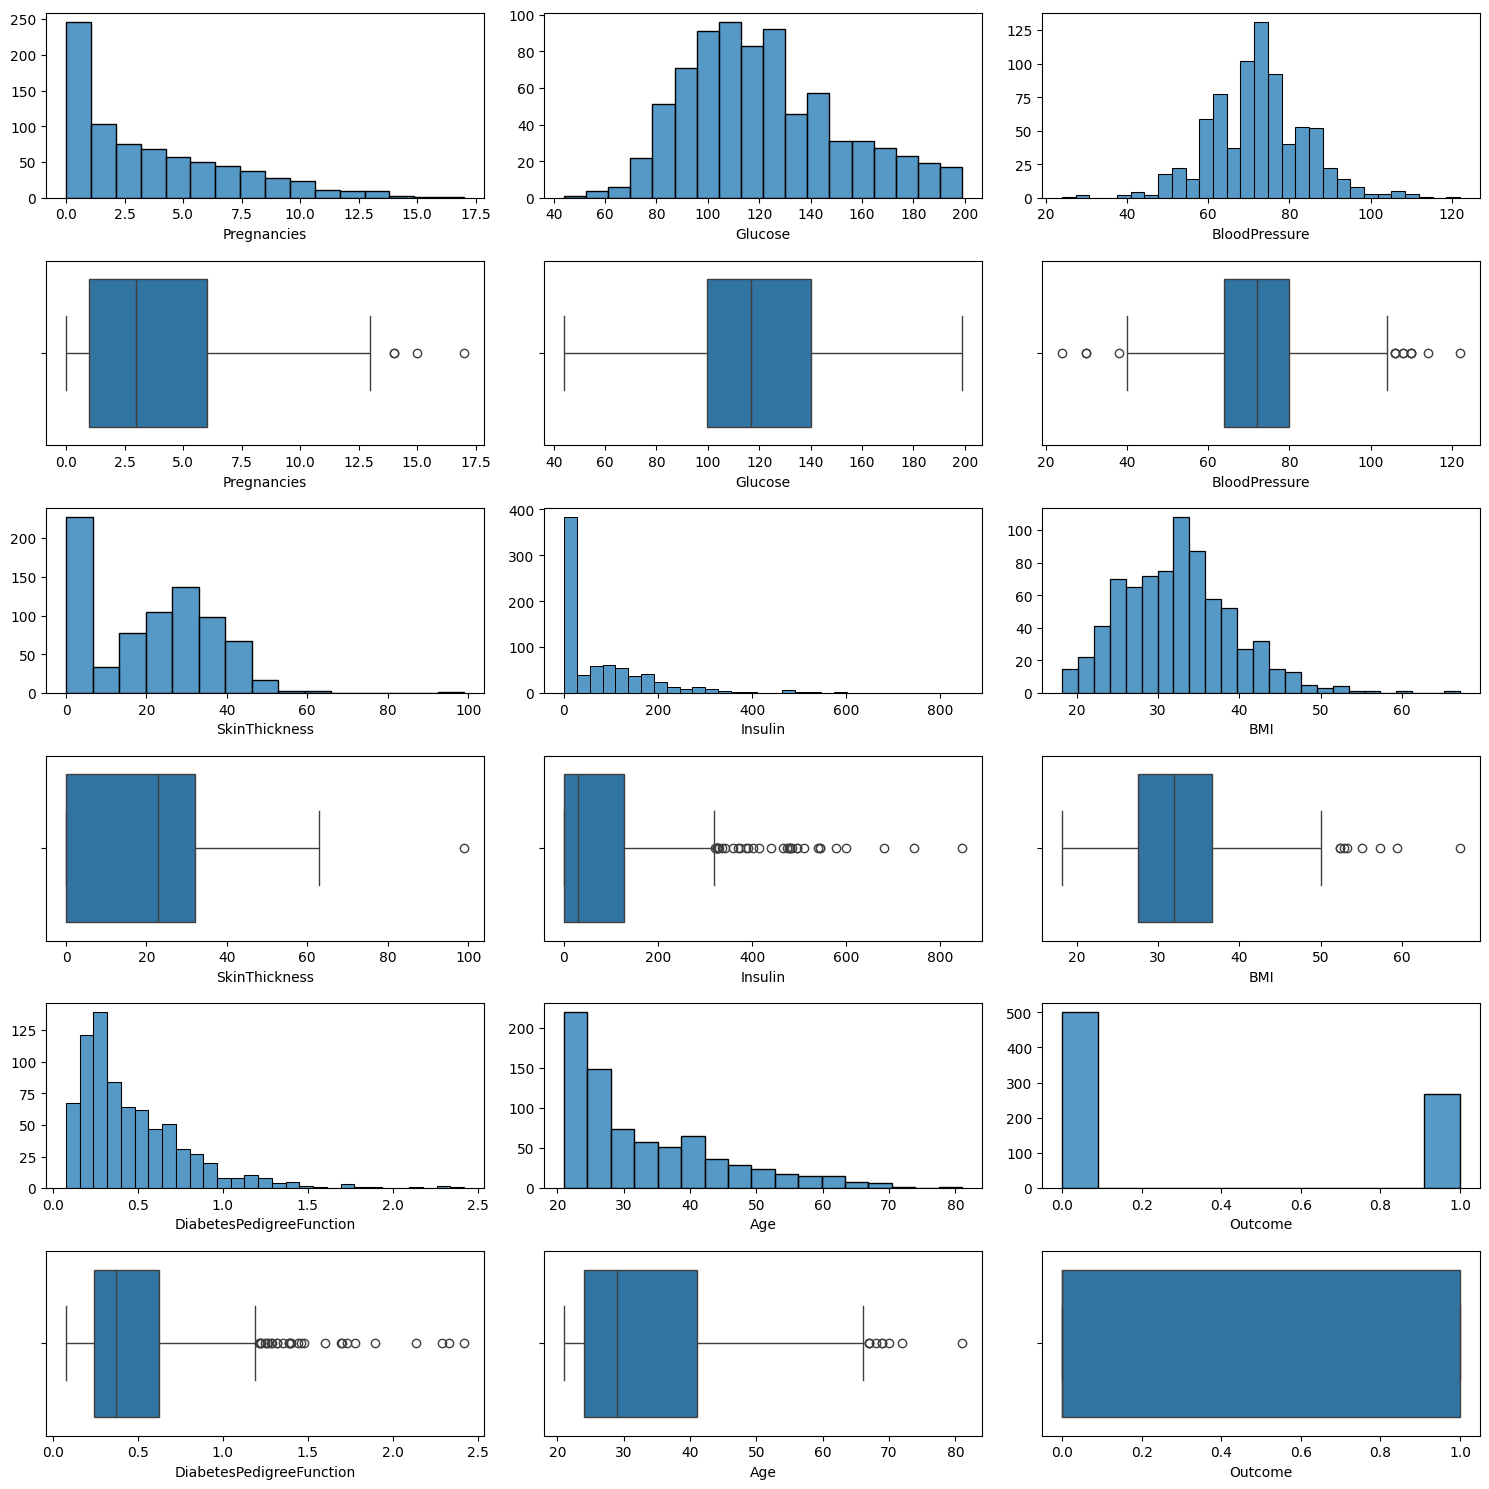

In [7]:
fig, axis = plt.subplots(6, 3, figsize = (15, 15))

sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies").set(ylabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = df, x = "Glucose").set(ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "Glucose")
sns.histplot(ax = axis[0, 2], data = df, x = "BloodPressure").set(ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "BloodPressure")
sns.histplot(ax = axis[2, 0], data = df, x = "SkinThickness").set(ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "SkinThickness")
sns.histplot(ax = axis[2, 1], data = df, x = "Insulin").set(ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "Insulin")
sns.histplot(ax = axis[2, 2], data = df, x = "BMI").set(ylabel = None)
sns.boxplot(ax = axis[3, 2], data = df, x = "BMI")
sns.histplot(ax = axis[4, 0], data = df, x = "DiabetesPedigreeFunction").set(ylabel = None)
sns.boxplot(ax = axis[5, 0], data = df, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[4, 1], data = df, x = "Age").set(ylabel = None)
sns.boxplot(ax = axis[5, 1], data = df, x = "Age")
sns.histplot(ax = axis[4, 2], data = df, x = "Outcome").set(ylabel = None)
sns.boxplot(ax = axis[5, 2], data = df, x = "Outcome")

plt.tight_layout()
plt.show()

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.loc[df["BloodPressure"] == 0, "BloodPressure"] = df["BloodPressure"].median()
df.loc[df["Glucose"] == 0, "Glucose"] = df["Glucose"].median()
df.loc[df["BMI"] == 0, "BMI"] = df["BMI"].median()

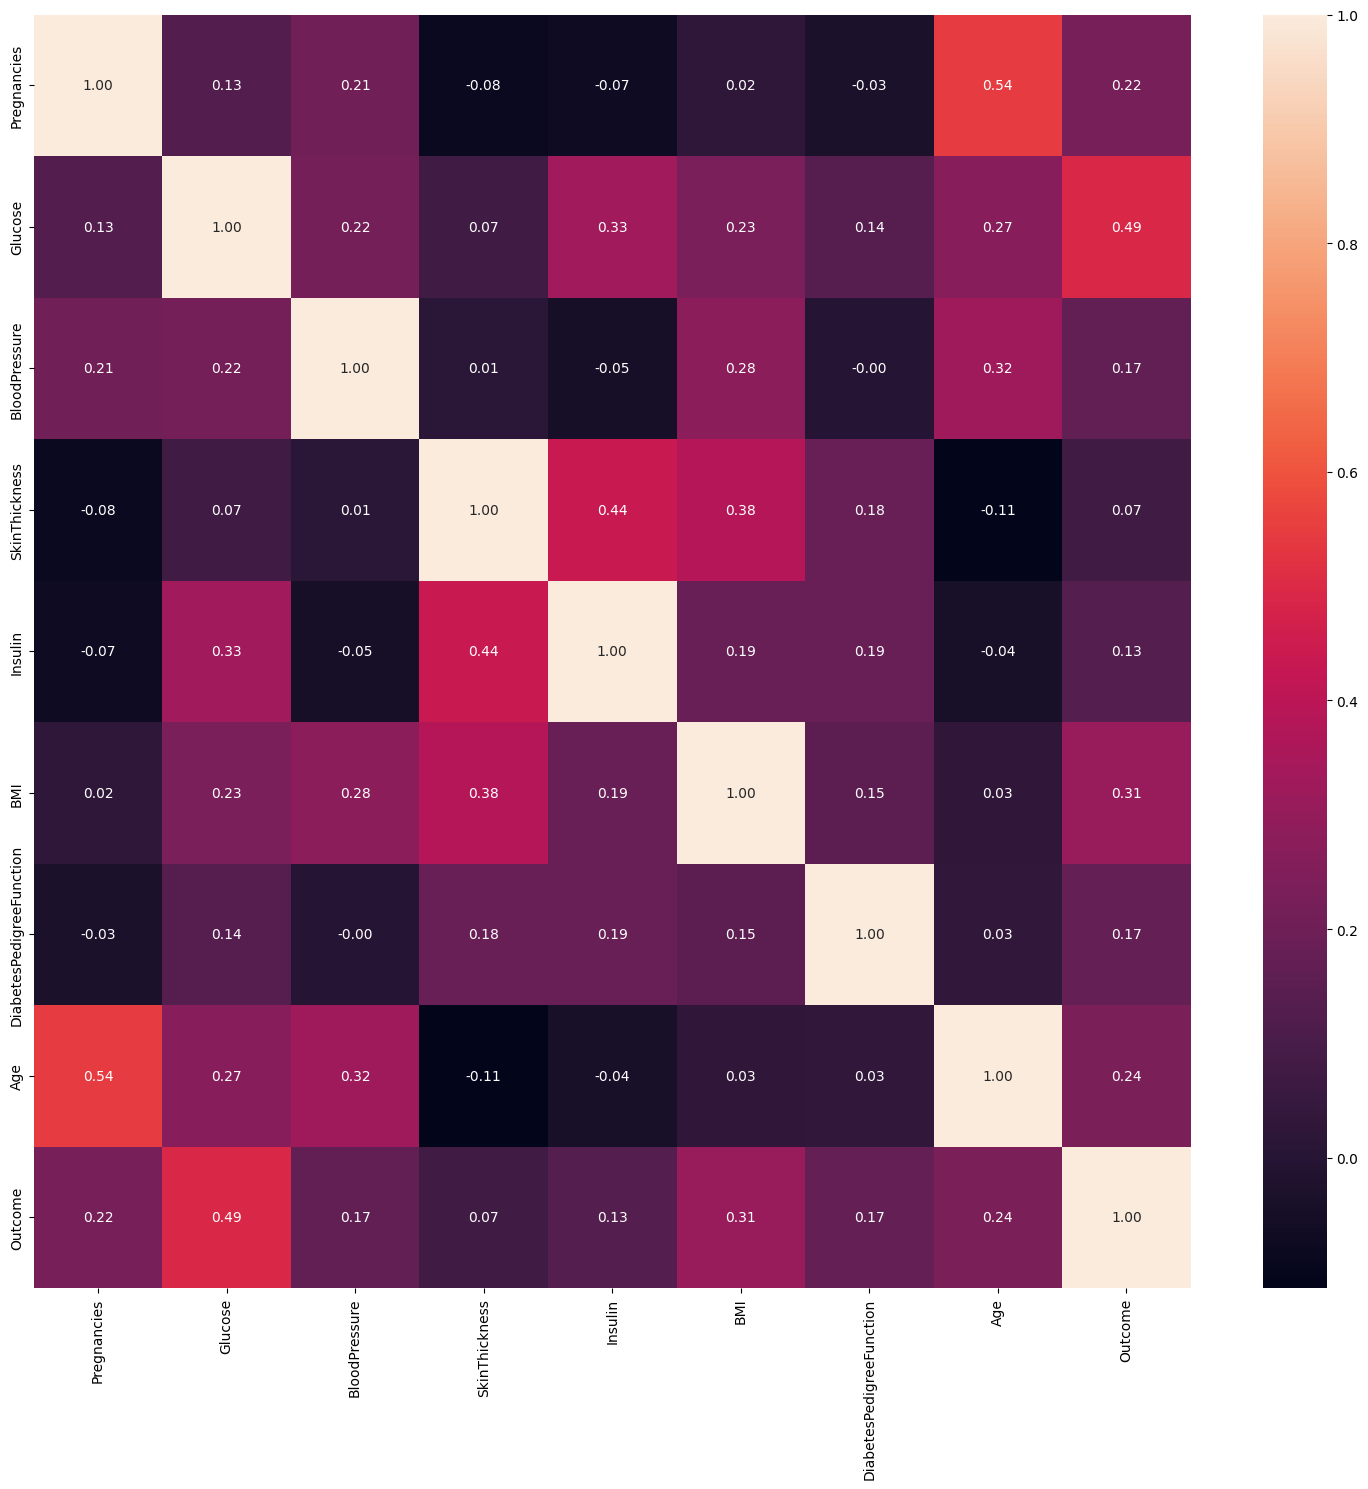

In [8]:
fig, axis = plt.subplots(figsize = (15,15))

sns.heatmap(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

In [9]:
print("Podemos observar que BloodPressure, SkinThickness e Insulin no tienen mucha correlación con la variable\nobjetivo. Lo que nos podria indicar que alguna de estas no tiene mucha relevancia en el modelo.")

Podemos observar que BloodPressure, SkinThickness e Insulin no tienen mucha correlación con la variable
objetivo. Lo que nos podria indicar que alguna de estas no tiene mucha relevancia en el modelo.


---

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,15.952218,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
X = df.drop(columns=["Outcome", "Insulin", "BloodPressure"])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Pregnancies,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,32.0,0.304,21
618,9,112,24,28.2,1.282,50
346,1,139,19,28.7,0.654,22
294,0,161,0,21.9,0.254,65
231,6,134,37,46.2,0.238,46


In [12]:
tree = DecisionTreeClassifier(random_state=42)

In [13]:
param_grid = {
    'max_depth': [5, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 3, 4, 5], 
    'criterion': ['gini', 'entropy']
}

In [14]:
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [5, 8, ...], 'min_samples_leaf': [2, 3, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [15]:
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [16]:
best_tree = grid_search.best_estimator_
best_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
y_probs = best_tree.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_probs)

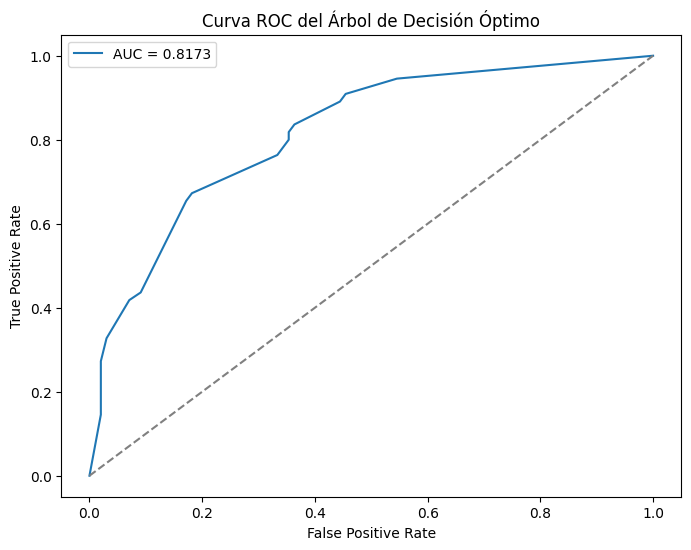

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC del Árbol de Decisión Óptimo')
plt.legend()
plt.show()

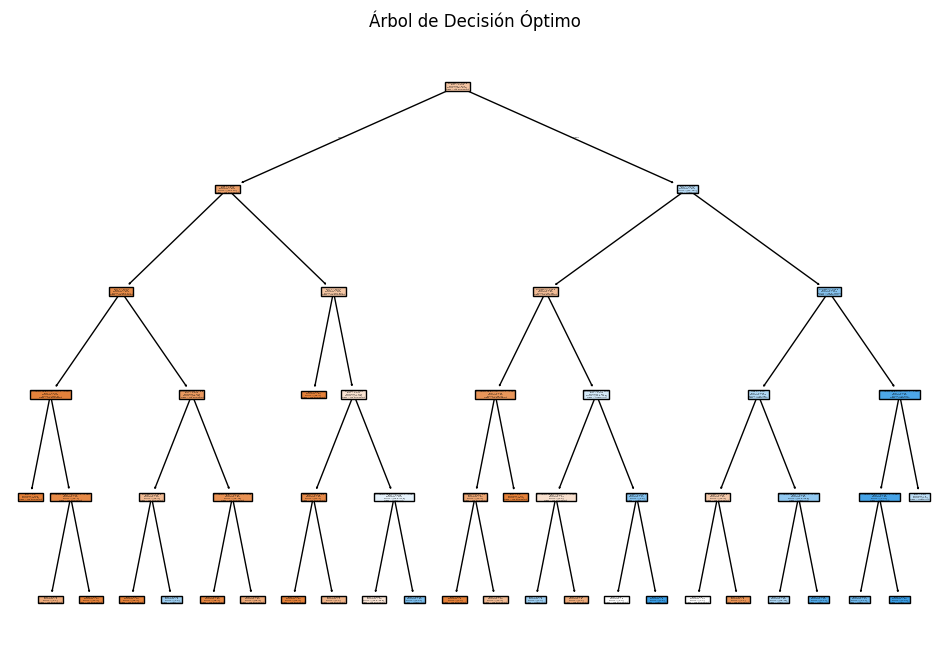

In [19]:
plt.figure(figsize=(12, 8))
plot_tree(best_tree, feature_names=X.columns, class_names=['No Sobrevivió', 'Sobrevivió'], filled=True)
plt.title("Árbol de Decisión Óptimo")
plt.show()

In [20]:
y_pred = best_tree.predict(X_test)

umbral = 0.5
y_pred = (y_probs >= umbral).astype(int)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7662337662337663
Precision: 0.6727272727272727
Recall: 0.6727272727272727
F1-score: 0.6727272727272727
Matriz de confusión:
[[81 18]
 [18 37]]


Guardarmos el modelo

In [23]:
dump(best_tree, open("../models/decision_tree_classifier_gini_5_4_10_42.sav", "wb"))